In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("twittertrain.csv")
train.drop('id',axis=1,inplace=True)
train.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [4]:
train["Lenth"]=train["tweet"].str.len()
train.head()

,label,tweet,Lenth
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [5]:
train.tweet.str.len().sum()

2708448

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(train.tweet)
sum_words=words.sum(axis=0)
sum_words

matrix([[ 51,  28,   2, ..., 272,   1,   2]], dtype=int64)

In [8]:
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq

[('user', 17577),
 ('father', 635),
 ('dysfunctional', 1),
 ('selfish', 13),
 ('drags', 4),
 ('kids', 204),
 ('dysfunction', 3),
 ('run', 107),
 ('thanks', 310),
 ('lyft', 5),
 ('credit', 14),
 ('use', 114),
 ('cause', 73),
 ('don', 665),
 ('offer', 27),
 ('wheelchair', 3),
 ('vans', 2),
 ('pdx', 3),
 ('disapointed', 1),
 ('getthanked', 2),
 ('bihday', 845),
 ('majesty', 10),
 ('model', 376),
 ('love', 2749),
 ('time', 1136),
 ('urð', 325),
 ('factsguide', 12),
 ('society', 27),
 ('motivation', 174),
 ('huge', 44),
 ('fan', 67),
 ('fare', 4),
 ('big', 197),
 ('talking', 67),
 ('leave', 136),
 ('chaos', 8),
 ('pay', 280),
 ('disputes', 1),
 ('allshowandnogo', 1),
 ('camping', 17),
 ('tomorrow', 437),
 ('dannyâ', 1),
 ('school', 197),
 ('year', 332),
 ('exams', 19),
 ('think', 409),
 ('hate', 240),
 ('imagine', 30),
 ('actorslife', 8),
 ('revolutionschool', 1),
 ('girl', 372),
 ('won', 176),
 ('land', 31),
 ('allin', 2),
 ('cavs', 37),
 ('champions', 9),
 ('cleveland', 28),
 ('clevelandc

In [10]:
cv.vocabulary_.items()

dict_items([('user', 38161), ('father', 12981), ('dysfunctional', 11373), ('selfish', 32080), ('drags', 11051), ('kids', 20140), ('dysfunction', 11372), ('run', 31207), ('thanks', 35980), ('lyft', 22203), ('credit', 8964), ('use', 38152), ('cause', 6850), ('don', 10839), ('offer', 26115), ('wheelchair', 39521), ('vans', 38306), ('pdx', 27319), ('disapointed', 10458), ('getthanked', 14989), ('bihday', 4699), ('majesty', 22413), ('model', 23785), ('love', 21856), ('time', 36564), ('urð', 38135), ('factsguide', 12742), ('society', 33470), ('motivation', 24090), ('huge', 17592), ('fan', 12859), ('fare', 12893), ('big', 4637), ('talking', 35449), ('leave', 20907), ('chaos', 7107), ('pay', 27260), ('disputes', 10579), ('allshowandnogo', 2089), ('camping', 6463), ('tomorrow', 36788), ('dannyâ', 9526), ('school', 31755), ('year', 40502), ('exams', 12432), ('think', 36335), ('hate', 16540), ('imagine', 18115), ('actorslife', 1434), ('revolutionschool', 30617), ('girl', 15111), ('won', 40020), (

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

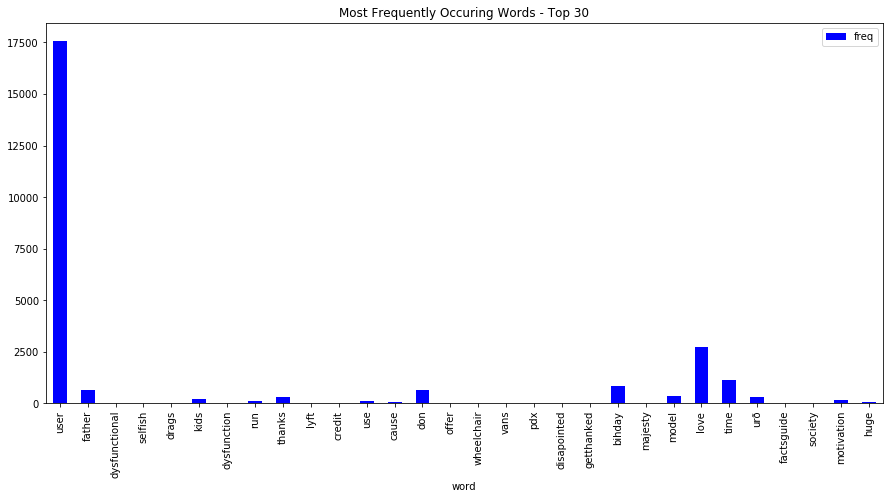

In [11]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

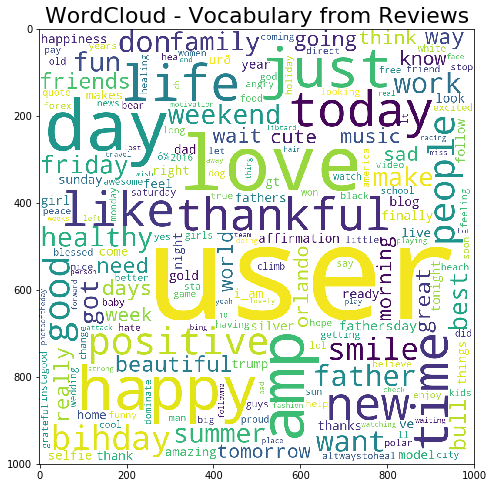

In [12]:
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [13]:
import re
def coll_hashtags(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags


In [14]:
positive=coll_hashtags(train["tweet"][train["label"]==0])
positive

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'

In [15]:
negative=coll_hashtags(train["tweet"][train["label"]==1])
negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'medâ'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics'],
 ['brexit'],
 ['people', 'trump', 'republican'],
 ['michelleobama'],
 ['knicks', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liberal', 'politics'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyping', 'prejudice', 'hope', 'hate', 'conflictâ'],
 ['pols', 'bluelivesmatter', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemitism', 'hocoschools', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotry'],
 ['libtard', 'sjw', 'liberal', 'politics'],
 ['p2', 'p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatter'],
 ['ushistory', 'eugenics'],
 ['biherism', 'bigotry', 'altright', 'potus', 'theresistance'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'mi

In [16]:
positive = sum(positive,[])
negative = sum(negative,[])

In [17]:
positive

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [18]:
negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p2',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'clevel

In [19]:
import nltk
a = nltk.FreqDist(positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
a

FreqDist({'love': 1531, 'positive': 874, 'healthy': 570, 'smile': 548, 'thankful': 491, 'fun': 434, 'life': 405, 'summer': 367, 'model': 364, 'affirmation': 363, ...})

In [20]:
d.nlargest(n=20,columns="Count")

,Hashtag,Count
33,love,1531
41,positive,874
163,healthy,570
212,smile,548
40,thankful,491
183,fun,434
403,life,405
223,summer,367
4,model,364
96,affirmation,363


In [22]:
train.head()

,label,tweet,Lenth
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [23]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",tweet.lower()).split())

In [24]:
train["tweet"]=train["tweet"].apply(process_tweet)
train.head()

,label,tweet,Lenth
0,0,when a father is dysfunctional and is so selfi...,102
1,0,thanks for lyft credit i cant use cause they d...,122
2,0,bihday your majesty,21
3,0,model i love u take with u all the time in ur,86
4,0,factsguide society now motivation,39


In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train["tweet"],train["label"], test_size = 0.2, random_state = 3)

In [26]:
xtest.head()

30714                                        pens fans are
3678                      euro16 is begin wow fozza italia
9157     14 ways to be a happier person via bwn inspira...
13190    we are so to see amazing musician looking fabu...
24642    if youre mad about and their interracial coupl...
Name: tweet, dtype: object

In [27]:
ytest.head()

30714    0
3678     0
9157     0
13190    0
24642    1
Name: label, dtype: int64

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)

In [29]:
text_clf=Pipeline([("vect",TfidfVectorizer()),
                   ("clf",MultinomialNB())])

In [30]:
text_clf.fit(xtrain,ytrain)

predicted=text_clf.predict(xtest)

In [31]:
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn import metrics
print(metrics.classification_report(ytest, predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5950
           1       1.00      0.09      0.16       443

   micro avg       0.94      0.94      0.94      6393
   macro avg       0.97      0.54      0.56      6393
weighted avg       0.94      0.94      0.91      6393



In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print("Accuracy:",accuracy_score(ytest,predicted))

Accuracy: 0.9366494603472548


In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [36]:
xtrain_counts = count_vect.fit_transform(xtrain)
xtraintfidf = transformer.fit_transform(xtrain_counts)

In [51]:
xtest_counts = count_vect.transform(xtest)
xtest_tfidf = transformer.transform(xtest_counts)
xtest_counts

<6393x35561 sparse matrix of type '<class 'numpy.int64'>'
	with 39168 stored elements in Compressed Sparse Row format>

In [38]:
model.fit(xtraintfidf,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
Rpredicted=model.predict(xtest_tfidf)

In [40]:
Rpredicted

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print(accuracy_score(ytest,Rpredicted))

0.9646488346629125


In [146]:
test=pd.read_csv("twittertest.csv")
#test.drop("id",axis=1,inplace=True)
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [147]:
def test_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",tweet.lower()).split())

In [148]:
test["tweet"]=test["tweet"].apply(test_tweet)
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ne...
2,31965,safe ways to heal your acne altwaystoheal heal...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew eli ...


In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [150]:
finaltest= count_vect.transform(test["tweet"])
finaltest_tfidf = transformer.transform(finaltest)
finaltest

<17197x35561 sparse matrix of type '<class 'numpy.int64'>'
	with 104695 stored elements in Compressed Sparse Row format>

In [151]:
finalpredicted=model.predict(finaltest_tfidf)

In [152]:
test.drop("tweet",axis=1,inplace=True)
test["label"]=finalpredicted
test.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


In [155]:
test.to_csv("NewTwitterResult.csv",index=False)
pd.read_csv("NewTwitterResult.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
label    17197 non-null int64
dtypes: int64(2)
memory usage: 268.8 KB


In [157]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain,ytrain) 
prediction = xgb.predict(xtest) 
print(f1_score(ytest, prediction)) 

ValueError: Please reshape the input data X into 2-dimensional matrix.